In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/raw/match_profiling.csv',
               encoding='latin-1')
df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
0,1237,1,1,2013/2014,1,29/03/2014 00:00,1677179,8475,9989
1,1238,1,1,2013/2014,1,29/03/2014 00:00,1677180,9991,8573
2,1239,1,1,2013/2014,2,05/04/2014 00:00,1677181,9989,9991
3,1240,1,1,2013/2014,2,05/04/2014 00:00,1677182,8573,8475
4,1241,1,1,2013/2014,3,12/04/2014 00:00,1677183,9991,8475
...,...,...,...,...,...,...,...,...,...
8165,25975,24558,24558,2015/2016,9,22/09/2015 00:00,1992091,10190,10191
8166,25976,24558,24558,2015/2016,9,23/09/2015 00:00,1992092,9824,10199
8167,25977,24558,24558,2015/2016,9,23/09/2015 00:00,1992093,9956,10179
8168,25978,24558,24558,2015/2016,9,22/09/2015 00:00,1992094,7896,10243


In [3]:
df.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
dtype: object

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [5]:
df = df.astype({'date':'datetime64[ns]'})
df.dtypes

C:\Users\gabri\AppData\Local\Temp\ipykernel_9420\2748521093.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = df.astype({'date':'datetime64[ns]'})


id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
dtype: object

In [6]:
df.describe()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id
count,8170.00,8170.00,8170.00,8170.00,8170,8170.00,8170.00,8170.00
mean,13985.66,11885.02,11885.02,19.95,2015-04-02 23:51:00.660954624,1803467.63,11856.32,11858.15
min,1237.00,1.00,1.00,1.00,2014-01-01 00:00:00,1467692.00,1601.00,1601.00
25%,7458.25,4769.00,4769.00,11.00,2014-09-21 00:00:00,1712537.25,8456.00,8456.00
50%,13230.50,10257.00,10257.00,21.00,2015-03-21 00:00:00,1778065.50,8689.00,8697.00
75%,19644.75,17642.00,17642.00,28.00,2015-11-28 00:00:00,1990137.75,9925.00,9925.00
max,25979.00,24558.00,24558.00,38.00,2016-05-25 00:00:00,2216672.00,274581.00,274581.00
std,7364.76,7523.74,7523.74,10.34,NaN,193512.77,24059.29,24058.95


In [7]:
simple_profile = df.describe(include='all')
simple_profile

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
count,8170.00,8170.00,8170.00,8170,8170.00,8170,8170.00,8170.00,8170.00
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2015/2016,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3326,NaN,NaN,NaN,NaN,NaN
mean,13985.66,11885.02,11885.02,NaN,19.95,2015-04-02 23:51:00.660954624,1803467.63,11856.32,11858.15
min,1237.00,1.00,1.00,NaN,1.00,2014-01-01 00:00:00,1467692.00,1601.00,1601.00
25%,7458.25,4769.00,4769.00,NaN,11.00,2014-09-21 00:00:00,1712537.25,8456.00,8456.00
50%,13230.50,10257.00,10257.00,NaN,21.00,2015-03-21 00:00:00,1778065.50,8689.00,8697.00
75%,19644.75,17642.00,17642.00,NaN,28.00,2015-11-28 00:00:00,1990137.75,9925.00,9925.00
max,25979.00,24558.00,24558.00,NaN,38.00,2016-05-25 00:00:00,2216672.00,274581.00,274581.00


In [8]:
profile = ProfileReport(df, title="Export Data Profiling Report")

In [9]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
def get_basic_profile(dataframe):
    quantile_range = 0.5
    results = {}
    
    for column in dataframe.columns:
        count = df[column].count()
        nans = df[column].isna().sum()
        min = df[column].min()
        max = df[column].max()
        median = df[column].median()
        std = df[column].std()
        kurt = df[column].kurt()
        skew = df[column].skew()
        quant = df[column].quantile(q=quantile_range)
        
        results[column] = {'count': count,
                            'count_na': nans,
                            'min':min,
                            'max':max,
                            'median':median,
                            'std':std,
                            'kurt':kurt,
                            'skew':skew,
                            'quant {quantile_range}':quant}
 
    return results

In [11]:
num_columns = df.select_dtypes(include=['int64','float64'])
basic_profile = get_basic_profile(num_columns)
basic_profile

{'id': {'count': 8170,
  'count_na': 0,
  'min': 1237,
  'max': 25979,
  'median': 13230.5,
  'std': 7364.761015664894,
  'kurt': -1.1869409630116785,
  'skew': -0.02791285563651086,
  'quant {quantile_range}': 13230.5},
 'country_id': {'count': 8170,
  'count_na': 0,
  'min': 1,
  'max': 24558,
  'median': 10257.0,
  'std': 7523.736256307101,
  'kurt': -1.2566757330402312,
  'skew': 0.0036226658127643647,
  'quant {quantile_range}': 10257.0},
 'league_id': {'count': 8170,
  'count_na': 0,
  'min': 1,
  'max': 24558,
  'median': 10257.0,
  'std': 7523.736256307101,
  'kurt': -1.2566757330402312,
  'skew': 0.0036226658127643647,
  'quant {quantile_range}': 10257.0},
 'stage': {'count': 8170,
  'count_na': 0,
  'min': 1,
  'max': 38,
  'median': 21.0,
  'std': 10.340094046646799,
  'kurt': -1.0700382501215289,
  'skew': -0.1647344248723468,
  'quant {quantile_range}': 21.0},
 'match_api_id': {'count': 8170,
  'count_na': 0,
  'min': 1467692,
  'max': 2216672,
  'median': 1778065.5,
  'st

Text(0.5, 1.0, 'Matches per stage')

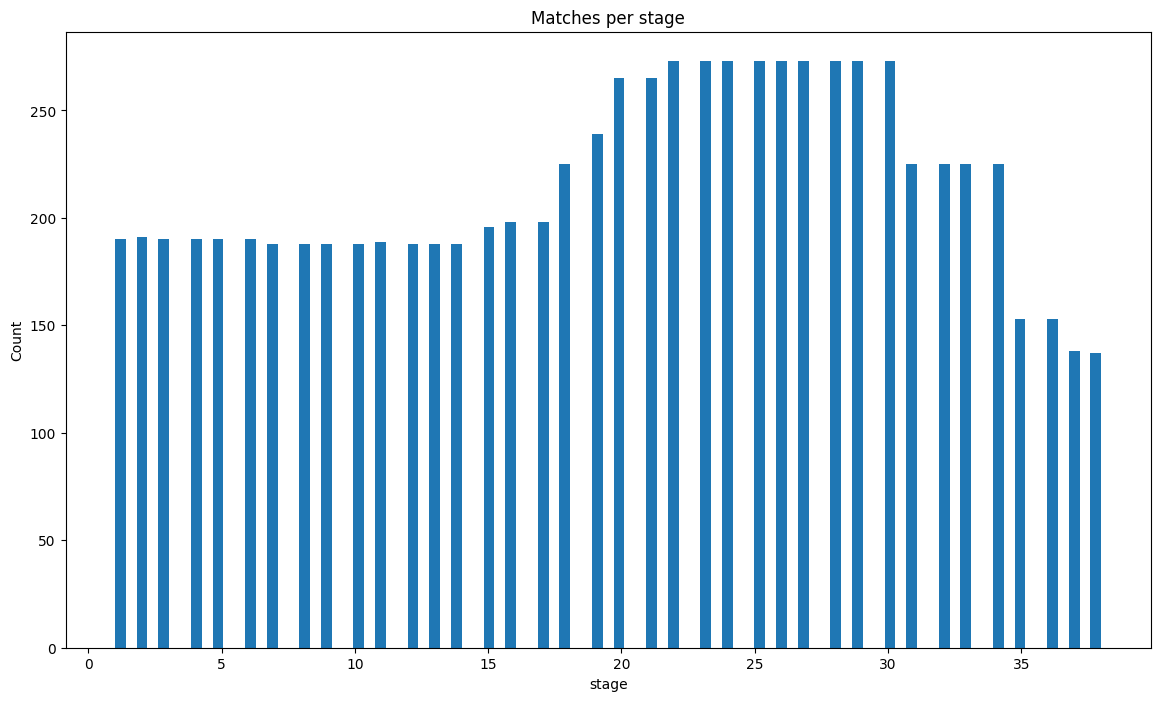

In [12]:
# square root choice
bins = int(np.ceil(np.sqrt(len(num_columns['stage']))))
 
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.hist(num_columns['stage'], bins)
 
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('stage')
ax.set_ylabel('Count')
ax.set_title(r'Matches per stage')
# plt.savefig("mygraph.jpg")